In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import pathlib

os.chdir(pathlib.Path(__file__).parent.joinpath('../'))

In [2]:
def parse_label_csv(file, columns=None):
    if columns is None:
        columns = ["epoch_time", "label"]
    label_df = pd.read_csv(file, sep="\t", header=None)
    label_df.columns = columns
    return label_df

label_df = parse_label_csv('./data/train/Label.txt')

In [3]:
label_df.head()

,epoch_time,label
0,1490431583000,4
1,1490431584000,4
2,1490431585000,4
3,1490431586000,4
4,1490431587000,4


In [4]:
label_df.shape

(980527, 2)

In [6]:
# Save prepared data to csv
label_df.to_parquet('data/train/Label.parquet', index=False)

# Prepare train-test split for train dataset
label_train, label_test = train_test_split(label_df, test_size=0.1, random_state=42)
label_df.to_parquet('data/train/Label.parquet', index=False)
label_train.to_parquet('data/train/Label_train.parquet', index=False)
label_test.to_parquet('data/train/Label_test.parquet', index=False)

validate_label_df = parse_label_csv('data/validate/Label.txt')
validate_label_df.to_parquet('data/validate/Label.parquet', index=False)

parse_label_csv('data/test/Label_idx.txt', columns=["epoch_time"]).to_parquet('data/test/Label_idx.parquet', index=False)

(array([29836., 26149.,  2774.,     0., 12031., 20473.,     0.,  9178.,
        21808., 21709.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

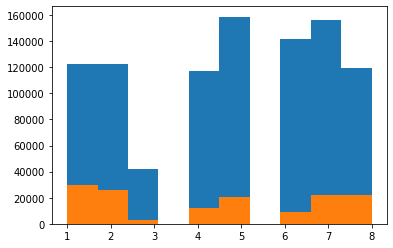

In [6]:
import matplotlib.pyplot as plt
plt.hist(label_df['label'])
plt.hist(validate_label_df['label'])